In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
import cv2
from skimage.morphology import binary_closing, binary_dilation, binary_erosion, binary_opening
from skimage.morphology import selem

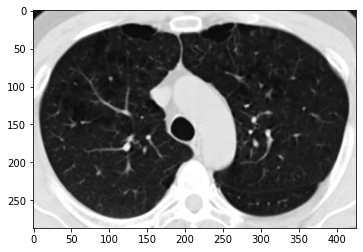

In [3]:
# Load our image as greyscale 
image = cv2.imread('New/NC2.png', 0)
#cv2.imshow('Original', image)
#cv2.waitKey(0)  
#cv2.destroyAllWindows()
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
image.shape

(287, 426)

In [5]:
# Let's  re-sizing by setting  dimensions
img_scaled = cv2.resize(image, (224, 224), interpolation = cv2.INTER_NEAREST)
cv2.imshow('Scaling-Resize Size', img_scaled) 
cv2.waitKey()

cv2.destroyAllWindows()

#plt.imshow(image, cmap='gray')
#plt.show()


In [7]:
img_scaled.shape

(224, 224)

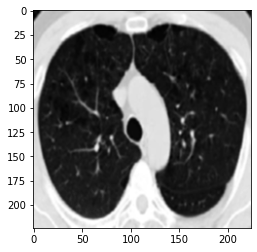

In [8]:
# It's good practice to blur images as it removes noise
image = cv2.GaussianBlur(img_scaled, (3, 3),0)
#cv2.imshow('Blured', image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.imshow(image, cmap='gray')
plt.show()

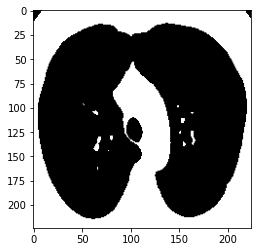

In [9]:
'''
# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
cv2.imshow("Adaptive Mean Thresholding", thresh) 
cv2.waitKey(0) 
cv2.destroyAllWindows()
'''

#OTSU hresholding 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#cv2.imshow("Otsu's Thresholding", th2) 
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(th2, cmap='gray')
plt.show()


In [10]:
th2.shape

(224, 224)

In [11]:
pixels = cv2.countNonZero(np.float32(th2))   #White pixels i.e pixcel>0
pixels

19372

In [12]:
height=224
width=224

In [13]:
Black_pixcel= (height*width)-pixels
Black_pixcel

30804

In [14]:
#Checking equivalent of pixels 
(height*width) == Black_pixcel+pixels

True

# Area Calculation

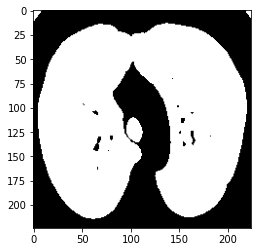

In [15]:
from skimage import filters
#camera = data.camera()
val = filters.threshold_otsu(image)
mask = image < val
plt.imshow(mask,cmap='gray')
plt.show()

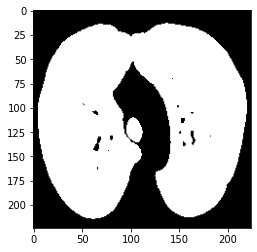

In [16]:
#Labeling image into connected regions of an integer array.Label the image.

from skimage.segmentation import clear_border

cleared = clear_border(mask)
plt.imshow(cleared, cmap = plt.cm.gray)
plt.show()

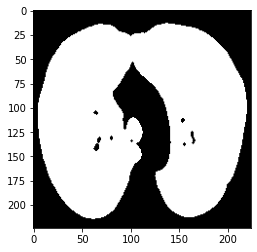

In [17]:
#Closing can remove small dark spots (i.e. “pepper”) and connect small bright cracks.
#Closure operation with a disk of radius 10. This operation is to keep nodules attached to the lung wall.

from skimage.morphology import binary_closing, disk, binary_dilation, binary_erosion, binary_opening
from skimage.morphology import selem

#selem = disk(2)
binary = binary_closing(cleared)
plt.imshow(binary, cmap = plt.cm.gray)
plt.show()


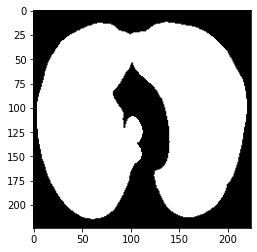

In [18]:
from skimage.filters import roberts
from scipy import ndimage as ndi

edges = roberts(binary)
binary = ndi.binary_fill_holes(edges)
#binary1 = ndi.binary_fill_holes(binary)
#binary2 = ndi.binary_fill_holes(binary1)
plt.imshow(binary, cmap = plt.cm.gray)
plt.show()

In [19]:
pixels_white = cv2.countNonZero(np.float32(binary))   #White pixels i.e pixcel>0
pixels_white

31566

In [20]:
infected= pixels_white-Black_pixcel
infected

762

In [21]:
severity_Score= infected/pixels_white
print("Infection/severity_Score: ", severity_Score)

severity_percentage= (severity_Score)*100
print("Percentage of infection/Severity:", severity_percentage)

Infection/severity_Score:  0.024139897357916745
Percentage of infection/Severity: 2.4139897357916746
